# example moving average

이동 평균을 그래프로 표현하고 이동평균선 20과 120선이 교차되는 골든크로스, 데드크로스를 파악할 수 있습니다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_json("../data/example00593.json", orient='series')
df = df[df['date']>"2019-01-01"]
df.reset_index(inplace=True)

df

,index,date,open,high,low,close,volume
0,4960,2019-01-02,39400,39400,38550,38750,7847664
1,4961,2019-01-03,38300,38550,37450,37600,12471493
2,4962,2019-01-04,37450,37600,36850,37450,14108958
3,4963,2019-01-07,38000,38900,37800,38750,12748997
4,4964,2019-01-08,38000,39200,37950,38100,12756554
...,...,...,...,...,...,...,...
1035,5995,2023-03-13,59900,60200,59300,60000,12779724
1036,5996,2023-03-14,59400,59500,59000,59000,12147346
1037,5997,2023-03-15,60000,60300,59600,59800,10482149
1038,5998,2023-03-16,59200,60200,59100,59900,10611939


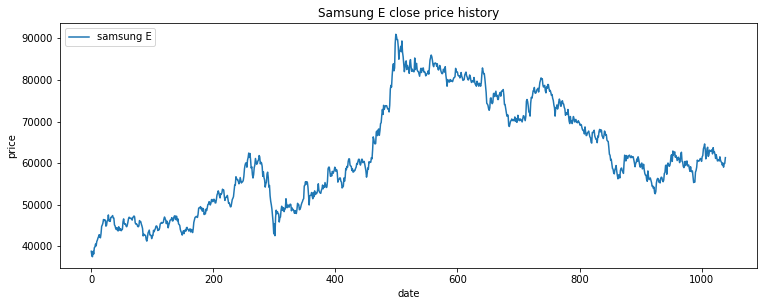

In [2]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(df['close'], label='samsung E')
plt.title('Samsung E close price history')
plt.xlabel('date')
plt.ylabel('price')
plt.legend(loc='upper left')
plt.show()

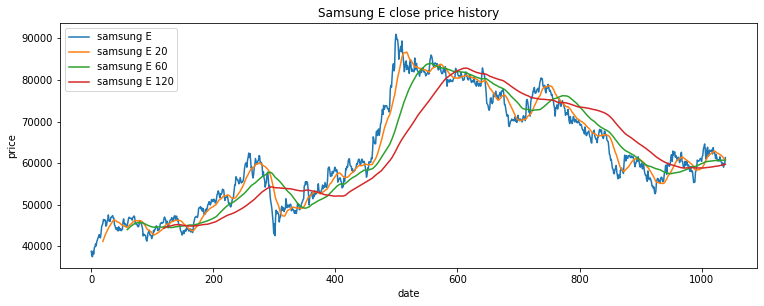

In [3]:
sma20 = pd.DataFrame()
sma40 = pd.DataFrame()
sma60 = pd.DataFrame()
sma120 = pd.DataFrame()
sma180 = pd.DataFrame()
sma200 = pd.DataFrame()

sma20['close'] = df['close'].rolling(window=20).mean()
sma40['close'] = df['close'].rolling(window=40).mean()
sma60['close'] = df['close'].rolling(window=60).mean()
sma120['close'] = df['close'].rolling(window=120).mean()
sma180['close'] = df['close'].rolling(window=180).mean()
sma200['close'] = df['close'].rolling(window=200).mean()


plt.figure(figsize=(12.5, 4.5))
plt.plot(df['close'], label='samsung E')
plt.plot(sma20['close'], label='samsung E 20')
plt.plot(sma60['close'], label='samsung E 60')
plt.plot(sma120['close'], label='samsung E 120')
plt.title('Samsung E close price history')
plt.xlabel('date')
plt.ylabel('price')
plt.legend(loc='upper left')
plt.show()

In [4]:
data = pd.DataFrame()
data['samsung'] = df['close']
data['SMA20'] = sma20['close']
data['SMA120'] = sma120['close']
data['SMA60'] = sma60['close']
data['SMA180'] = sma180['close']
data['SMA40'] = sma40['close']
data['SMA200'] = sma200['close']

## 이동평균선 골든 크로스, 데드크로스

In [26]:
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    account = 1000000
    stock = 0
    for i in range(len(data)):
        if data['SMA20'][i] > data['SMA120'][i]:
            if flag != 1:
                sigPriceBuy.append(data['samsung'][i])
                current = data['samsung'][i]
                stock = int(account/current)
                account = account-(current*stock)
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA20'][i] < data['SMA120'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['samsung'][i])
                current = data['samsung'][i]
                account = account+(current*stock)
                stock = 0
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    basic = 1000000
    evaluation = stock*data['samsung'].iloc[-1]
    print("예수금", account)
    print("보유주식수", stock)
    print("평가금액: ", evaluation)
    print("수익금: ", evaluation-basic)
    print("수익률: ", (evaluation-basic)/basic*100,"%")
    return (sigPriceBuy, sigPriceSell)

In [27]:
def buy_sell2(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    account = 1000000
    stock = 0
    for i in range(len(data)):
        if data['SMA60'][i] > data['SMA180'][i]:
            if flag != 1:
                sigPriceBuy.append(data['samsung'][i])
                current = data['samsung'][i]
                stock = int(account/current)
                account = account-(current*stock)
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA60'][i] < data['SMA180'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['samsung'][i])
                current = data['samsung'][i]
                account = account+(current*stock)
                stock = 0
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    basic = 1000000
    evaluation = stock*data['samsung'].iloc[-1]
    print("예수금", account)
    print("보유주식수", stock)
    print("평가금액: ", evaluation)
    print("수익금: ", evaluation-basic)
    print("수익률: ", (evaluation-basic)/basic*100,"%")
    return (sigPriceBuy, sigPriceSell)

In [28]:
def buy_sell3(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    account = 1000000
    stock = 0
    for i in range(len(data)):
        if data['SMA20'][i] > data['SMA60'][i]:
            if flag != 1:
                sigPriceBuy.append(data['samsung'][i])
                current = data['samsung'][i]
                stock = int(account/current)
                account = account-(current*stock)
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA20'][i] < data['SMA60'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['samsung'][i])
                current = data['samsung'][i]
                account = account+(current*stock)
                stock = 0
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    basic = 1000000
    evaluation = stock*data['samsung'].iloc[-1]
    print("예수금", account)
    print("보유주식수", stock)
    print("평가금액: ", evaluation)
    print("수익금: ", evaluation-basic)
    print("수익률: ", (evaluation-basic)/basic*100,"%")
    return (sigPriceBuy, sigPriceSell)

In [29]:
def buy_sell4(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    account = 1000000
    stock = 0
    for i in range(len(data)):
        if data['SMA60'][i] > data['SMA120'][i]:
            if flag != 1:
                sigPriceBuy.append(data['samsung'][i])
                current = data['samsung'][i]
                stock = int(account/current)
                account = account-(current*stock)
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA60'][i] < data['SMA120'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['samsung'][i])
                current = data['samsung'][i]
                account = account+(current*stock)
                stock = 0
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    basic = 1000000
    evaluation = stock*data['samsung'].iloc[-1]
    print("예수금", account)
    print("보유주식수", stock)
    print("평가금액: ", evaluation)
    print("수익금: ", evaluation-basic)
    print("수익률: ", (evaluation-basic)/basic*100,"%")
    return (sigPriceBuy, sigPriceSell)

In [30]:
def buy_sell5(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    account = 1000000
    stock = 0
    for i in range(len(data)):
        if data['SMA60'][i] > data['SMA200'][i]:
            if flag != 1:
                sigPriceBuy.append(data['samsung'][i])
                current = data['samsung'][i]
                stock = int(account/current)
                account = account-(current*stock)
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA60'][i] < data['SMA200'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['samsung'][i])
                current = data['samsung'][i]
                account = account+(current*stock)
                stock = 0
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    basic = 1000000
    evaluation = stock*data['samsung'].iloc[-1]
    print("예수금", account)
    print("보유주식수", stock)
    print("평가금액: ", evaluation)
    print("수익금: ", evaluation-basic)
    print("수익률: ", (evaluation-basic)/basic*100,"%")
    return (sigPriceBuy, sigPriceSell)

## 이동평균선 매매전략에 따른 수익률

In [31]:
print("20일 x 120일")
buy_sell = buy_sell(data)
print("------ <> ------")
print("60일 x 180일")
bs = buy_sell2(data)
print("------ <> ------")
print("20일 x 60일")
bs2 = buy_sell3(data)
print("------ <> ------")
print("60일 x 120일")
bs3 = buy_sell4(data)
print("------ <> ------")
print("60일 x 200일")
bs5 = buy_sell5(data)

20일 x 120일
예수금 18550
보유주식수 17
평가금액:  1042100
수익금:  42100
수익률:  4.21 %
------ <> ------
60일 x 180일
예수금 17300
보유주식수 22
평가금액:  1348600
수익금:  348600
수익률:  34.86 %
------ <> ------
20일 x 60일
예수금 57200
보유주식수 18
평가금액:  1103400
수익금:  103400
수익률:  10.34 %
------ <> ------
60일 x 120일
예수금 35500
보유주식수 24
평가금액:  1471200
수익금:  471200
수익률:  47.12 %
------ <> ------
60일 x 200일
예수금 31550
보유주식수 19
평가금액:  1164700
수익금:  164700
수익률:  16.470000000000002 %


In [163]:
data['Buy_Signal_Price'] = bs3[0]
data['Sell_Signal_Price'] = bs3[1]

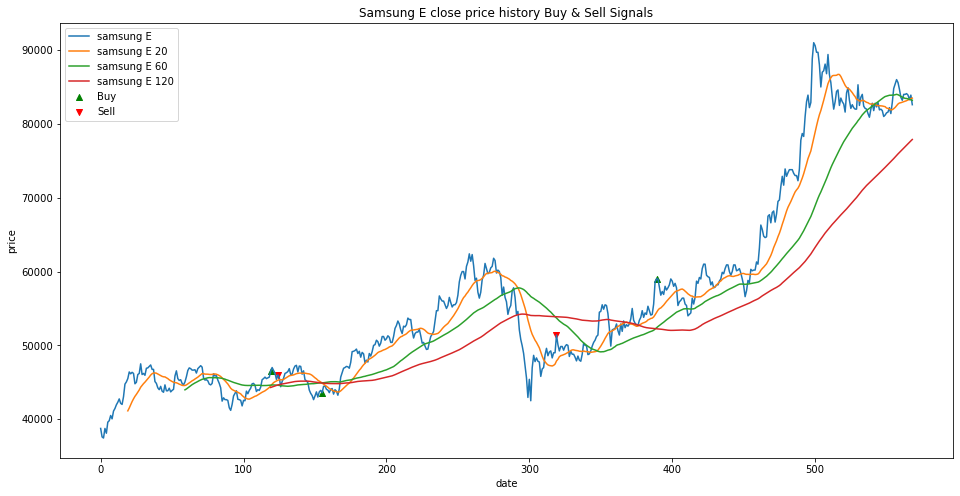

In [164]:
plt.figure(figsize=(16, 8))
plt.plot(df['close'], label='samsung E')
plt.plot(sma20['close'], label='samsung E 20')
plt.plot(sma60['close'], label='samsung E 60')
plt.plot(sma120['close'], label='samsung E 120')
plt.scatter(data.index, data['Buy_Signal_Price'], label='Buy', marker='^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label='Sell', marker='v', color = 'red')
plt.title('Samsung E close price history Buy & Sell Signals')
plt.xlabel('date')
plt.ylabel('price')
plt.legend(loc='upper left')
plt.show()

참고문헌 : https://www.youtube.com/watch?v=SEQbb8w7VTw